In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,round_winner,player_1_team_name,player_1_name,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,G2 Esports,NiKo,0,1,1,0,0,0.0,700.0,...,0,0,0,0,1,0,1,1,0,0
1,1,G2 Esports,NiKo,0,1,2,0,1,100.0,4100.0,...,0,0,0,0,1,1,1,1,0,0
2,0,G2 Esports,NiKo,0,1,3,0,1,100.0,5100.0,...,0,0,0,0,1,1,0,1,0,0
3,1,G2 Esports,NiKo,0,3,4,0,1,100.0,2800.0,...,0,0,0,0,1,1,0,1,0,0
4,1,G2 Esports,NiKo,0,4,5,0,0,0.0,200.0,...,0,0,0,0,1,1,1,1,0,0


In [3]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,0,1,1,0,0,0.0,700.0,1650,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,1,2,0,1,100.0,4100.0,150,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1,3,0,1,100.0,5100.0,1000,1,...,0,0,0,0,1,1,0,1,0,0
3,1,0,3,4,0,1,100.0,2800.0,400,0,...,0,0,0,0,1,1,0,1,0,0
4,1,0,4,5,0,0,0.0,200.0,3100,0,...,0,0,0,0,1,1,1,1,0,0


In [4]:
X = df.drop(['round_winner'], axis=1)
X.head()

,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,player_1_M4A1-S,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,0,1,1,0,0,0.0,700.0,1650,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,2,0,1,100.0,4100.0,150,0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,1,3,0,1,100.0,5100.0,1000,1,0,...,0,0,0,0,1,1,0,1,0,0
3,0,3,4,0,1,100.0,2800.0,400,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,4,5,0,0,0.0,200.0,3100,0,0,...,0,0,0,0,1,1,1,1,0,0


In [5]:
y = df['round_winner']

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

c:\Projects\License\Models\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        60,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5081 - loss: 3.8916 - val_accuracy: 0.5779 - val_loss: 3.2985
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5966 - loss: 3.1631 - val_accuracy: 0.6618 - val_loss: 2.7921
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6284 - loss: 2.6891 - val_accuracy: 0.6971 - val_loss: 2.3932
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 2.3032 - val_accuracy: 0.7324 - val_loss: 2.0676
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 1.9777 - val_accuracy: 0.7544 - val_loss: 1.8128
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 1.7569 - val_accuracy: 0.7471 - val_loss: 1.6124
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 1.5188 - val_accuracy: 0.7500 - val_loss: 1.4537
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 1.3665 - val_accuracy: 0.7515 - v

In [13]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7267 - loss: 0.8623
Test Loss: 0.8723676800727844
Test Accuracy: 0.7262044548988342


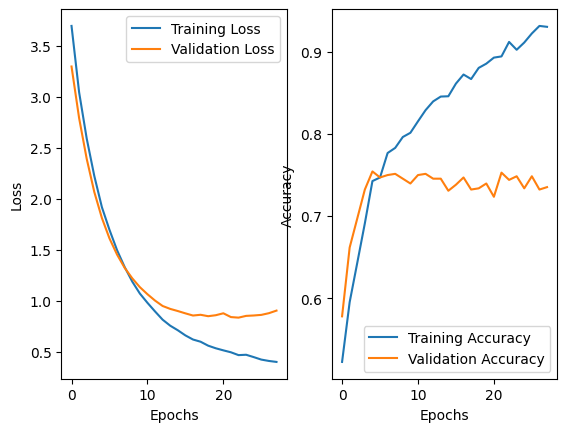

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()